<!DOCTYPE html>
<html lang=”en”>
   <body>
      <!--Centered Image Start-->
      <div style="text-align: center;">
         <img width="500" src="https://tuwaiq.edu.sa/img/logo.png" alt="Tuwaiq Academy">
      </div>

   </body>
</html>

<div style="text-align: center;">
     
<h2>Group 6</h2>
<h3>Manar Khamees</h3>
<h3>Amjad Almohammadi</h3>
<h3>Salwa Ibrahim</h3>
 
  </div>    
</body>
</html>

# Project: Marketing Campaigns

**Problem Scenario:**
Marketing mix is a popular concept used in implementing marketing strategies. It includes multiple areas of focus as part of a comprehensive marketing plan, which revolves around the four Ps of marketing: product, price, place, and promotion.

**Problem Objective:**
Gain a better understanding of the various factors that contribute to customer acquisition by performing exploratory data analysis and hypothesis testing.

**Data Description:**
The tabular data provided to the user includes variables related to the four Ps of marketing:

* **People:** birth-year, education, income, etc.
* **Product:** amount spent on wine, fruits, gold, etc.
* **Place:** sales channels, like websites, stores, etc.
* **Promotion:** promotions and results of different campaigns.

| Variable | Description |
|---|---|
| ID | Customer's unique identifier |
| Year of birth | Customer's year of birth |
| Education | Customer's highest level of education |
| Marital Status | Customer's marital status |
| Income | Customer's annual income |
| Kidhome | Number of children at home |
| Teenhome | Number of teenagers at home |
| Dt_Customer | Date the customer became a customer |
| Recency | Number of days since the customer's last purchase |
| MntWines | Amount spent on wine in the past year |
| MntFruits | Amount spent on fruits in the past year |
| MntMeatProducts | Amount spent on meat products in the last 2 years |
| MntFishProducts | Amount spent on fish products in the last 2 years |
| MntSweetProducts | Amount spent on sweet products in the last 2 years |
| MntGoldProds | Amount spent on gold products in the last 2 years |
| NumDealsPurchases | Number of purchases made through deals in the last 2 years |
| NumWebPurchases | Number of purchases made through the web in the last 2 years |
| NumCatalog Purchases | Number of purchases made through the catalog in the last 2 years |
| NumStorePurchases | Number of purchases made in stores in the last 2 years |
| NumWebVisitsMonth | Number of visits to the website in the past month |
| AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
| AcceptedCmp1 | 1 if the customer accepted the offer in the first campaign, 0 otherwise |
| AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
| Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise |
| Complain | 1 if customer complained in the last 2 years |
| Country | Customer's country of residence |

## Tasks

### Stage 1: Data Preparation

* Import the data and investigate variables to check if they are imported correctly.
* Perform missing value imputation for income values.
* Clean the data, if necessary.
* Create variables to populate the total number of children, age, and total spending.

### Stage 2: Data Exploration

* Create box plots and histograms to understand the distributions and outliers.
* Perform outlier treatment.
* ~~Use ordinal encoding and one hot encoding according to different types of categorical variables.~~
* Create a heatmap to showcase the correlation between different pairs of variables.

### Stage 3: Hypothesis Testing

Test the following hypotheses:

* Older people are not as tech-savvy and probably prefer shopping in-store.
* Customers with kids probably have less time to visit a store and would prefer to shop online.
* Other distribution channels may cannibalize sales at the store.
* Does the US fare significantly better than the rest of the world in terms of total purchases?

### Stage 4: Data Visualization

Use appropriate visualization to help analyze the following:

* Which products are performing the best, and which are performing the least in terms of revenue?
* Is there any pattern between the age of customers and the last campaign acceptance rate?
* Which Country has the greatest number of customers who accepted the last campaign?
* Do you see any pattern in the no. of children at home and total spend?
* Education background of the customers who complained in the last 2 years.


### Stage 1: Data Preparation

In [73]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime 

#### Import the data and investigate variables to check if they are imported correctly.

In [74]:
#Reads the given file 
df = pd.read_csv('marketing_data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


#### Perform missing value imputation for income values.

In [75]:
#Counts the number of null/missing values
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


#### Clean the data, if necessary.

In [76]:
#checks if we have duplicated rows 
df.duplicated().sum()

0

In [77]:
#checks if we have any null or missing values return true 
df.isnull().values.any()
#True >> we do have missing values
#False >> we do not have missing values 

True

In [6]:
#checks if we have invalid enteries
invalid_values = [np.nan, None,'']
print(df.isin(invalid_values).sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [7]:
#checks and investigate abnormalities in the dataFrame
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [8]:
#Removes the extra whitespaces before or after the column name
df.columns = df.columns.str.replace(' ', '') 

# print file after removing special character 
#print("\n\n", df) 

In [9]:
#Removes the dollar sign from the string income and then convert it to float type
df['Income'] = df['Income'].str.replace('[\$,]', '', regex=True).astype(float)

In [10]:
#Get the mean of the income so we can fill the missing data later
mean = df['Income'].mean()
print("The mean of income: " , mean) 

The mean of income:  52247.25135379061


In [11]:
#Filling the missing cells in income column using the mean of income
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [12]:
#Making sure that we filled the null values in income column
print(df.isna().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


In [13]:
# Convert the str to lower cases to be consistant 
columns_to_lower = ['Education', 'Marital_Status']
df[columns_to_lower] = df[columns_to_lower].applymap(lambda x: x.lower())

#### Create variables to populate the total number of children, age, and total spending.

In [14]:
#Find the age for each customer
this_year = datetime.now().year

#calculates the age of customers
df['Age'] = this_year - df['Year_Birth']

In [15]:
#Sums the kids and teens number for each customer to total number of children 
df['Total_Children'] = df.loc[:,['Kidhome','Teenhome']].sum(axis=1)

In [16]:
#Sums the total number of spending/purchases for each customer
df['Total_Spending'] = df.loc[:,['MntWines','MntFruits', 'MntMeatProducts', 
                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [17]:
#Check if the columns were added correctly
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Children,Total_Spending
0,1826,1970,graduation,divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,53,0,1190
1,1,1961,graduation,single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,62,0,577
2,10476,1958,graduation,married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,65,1,251
3,1386,1967,graduation,together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,AUS,56,2,11
4,5371,1989,graduation,single,21474.0,1,0,4/8/14,0,6,...,0,0,0,0,1,0,SP,34,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,phd,divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,0,US,47,1,689
2236,5263,1977,2n cycle,married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,0,SP,46,1,55
2237,22,1976,graduation,divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,0,SP,47,1,309
2238,528,1978,graduation,married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,0,IND,45,0,1383


### Stage 2: Data Exploration

#### Create box plots and histograms to understand the distributions and outliers.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

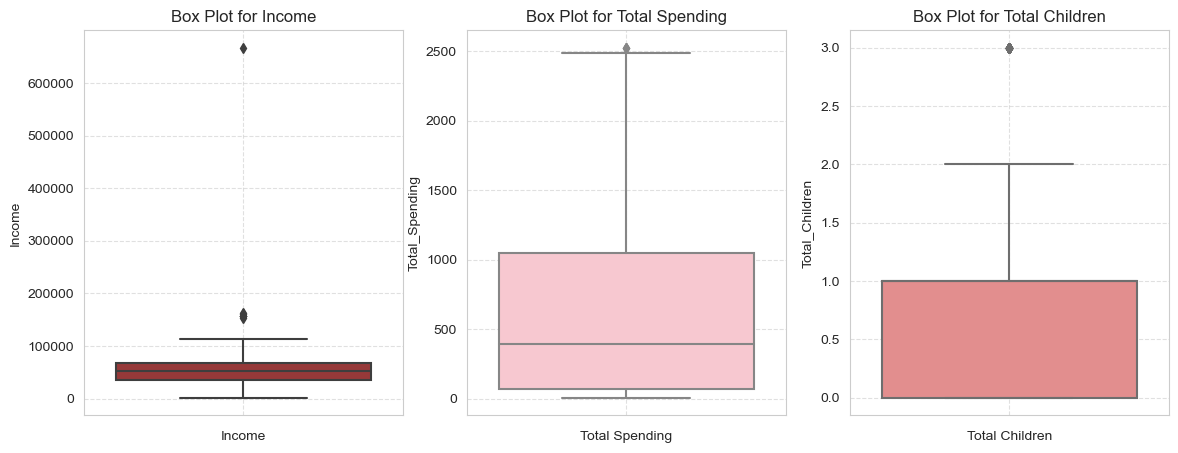

In [19]:
# Setting up color pallete and style
sns.set_palette("muted")
sns.set_style("whitegrid")

plt.figure(figsize=(14, 5))

# 1st boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Income', color='brown')
plt.title('Box Plot for Income')
plt.xlabel('Income')
plt.grid(True, linestyle='--', alpha=0.6)

#2nd plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Total_Spending', color='pink')
plt.title('Box Plot for Total Spending')
plt.xlabel('Total Spending')
plt.grid(True, linestyle='--', alpha=0.6)

#3rd plot
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='Total_Children', color='lightcoral')
plt.title('Box Plot for Total Children')
plt.xlabel('Total Children')
plt.grid(True, linestyle='--', alpha=0.6);

# plt.tight_layout()
# plt.show()

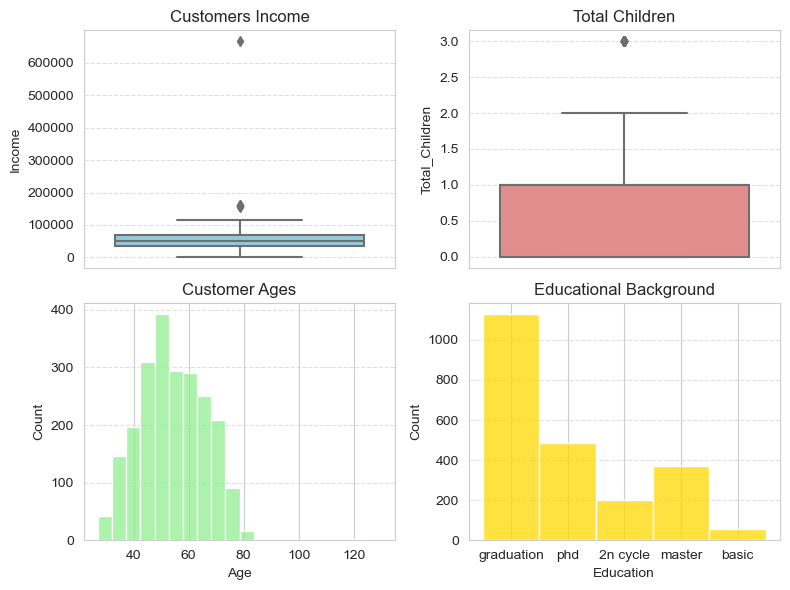

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set3")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Box plots
sns.boxplot(data=df, y='Income', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Customers Income')
#axes[0, 0].set_xlabel('Income')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.boxplot(data=df, y='Total_Children', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Total Children')
#axes[0, 1].set_xlabel('Total Children')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.6)

# Histograms
sns.histplot(data=df, x='Age', bins=20, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Customer Ages')
axes[1, 0].set_xlabel('Age')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.histplot(data=df, x='Education', bins=20, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Educational Background')
axes[1, 1].set_xlabel('Education')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### Perform outlier treatment.

In [21]:
from scipy import stats

In [23]:
#Outliers for income 
#Find the quantiles first 
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

#The Lower_Spending and Upper_Spending are used to identify data points that lie outside the overall pattern in a distribution. 
#A data point is considered an outlier if it is more than 1.5 times the IQR above the third quartile or below the 
#first quartile.
#Find the IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]
df['Income'] = df['Income'].clip(lower=lower_bound, upper=upper_bound)

In [24]:
#Outliers for age 
#Find the quantiles first 
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

#Find the IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

#### Testing outlier treatment

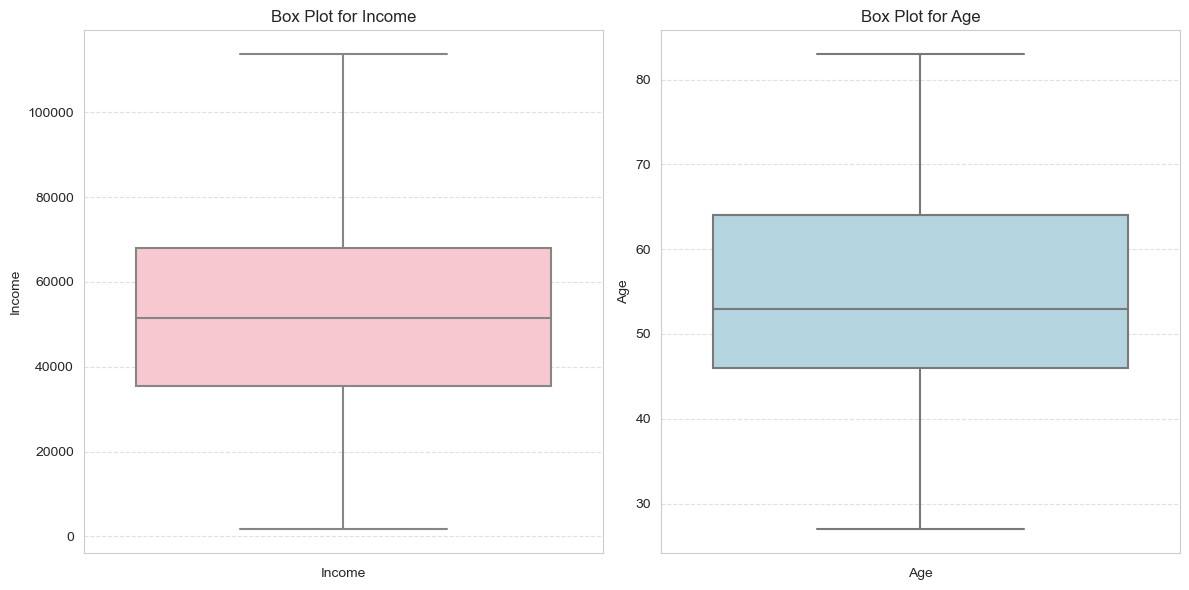

In [25]:
#Check by plotting if we removed the outliers correctly

sns.set_palette("Set2")
sns.set_style("whitegrid")


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plots for 'Income' after outlier treatment
sns.boxplot(data=df, y='Income', ax=axes[0], color='pink')
axes[0].set_title('Box Plot for Income')
axes[0].set_xlabel('Income')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Box plots for 'Age' after outlier treatment
sns.boxplot(data=df, y='Age', ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot for Age')
axes[1].set_xlabel('Age')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### Create a heatmap to showcase the correlation between different pairs of variables.

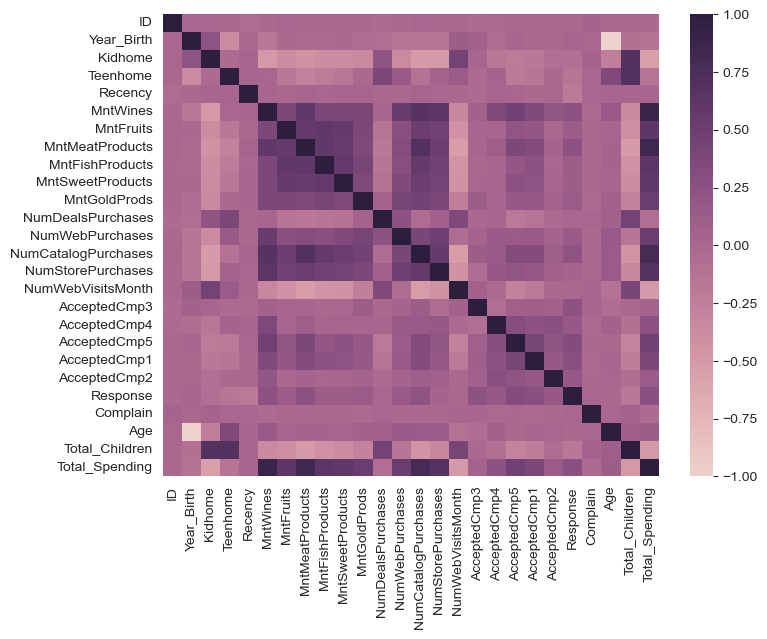

In [26]:
# Select only integer columns (excluding object columns) and store it in another df
df2 = df.select_dtypes(include='int')

# Create a correlation matrix
corr_matrix = df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap=sns.cubehelix_palette(as_cmap=True));

### Stage 3: Hypothesis Testing

In [27]:
import numpy as np
from scipy import stats

#### Older people are not as tech-savvy and probably prefer shopping in-store.

In [72]:
#Gets the senior group, people above 60 and compare their acitivity.
#Type: Two sample Paired t-test (same group twice)

seniors_web = df[df['Age']>=60]['NumWebPurchases']
seniors_store = df[df['Age']>=60]['NumStorePurchases']

# Determine significance level
alpha = 0.05

# Calculate the p-value
_, p_value = stats.ttest_rel(seniors_store, seniors_web, alternative='greater')

# if the p-value is less than the significance level, reject the null hypothesis
print(f"p-value: {p_value:.4f}")
if p_value <= alpha:
    test_result = "there is strong evidence suggesting store purchases is grater than web shopping!"
else:
    test_result = "there is not enough evidence to show that store purchases is grater than web shopping"

print(test_result)

p-value: 0.0000
there is strong evidence suggesting store purchases is grater than web shopping!


/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/1972553174.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(seniors_web, color='blue', label='Web Purchases', shade=True)
/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/1972553174.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(seniors_store, color='green', label='Store Purchases', shade=True)


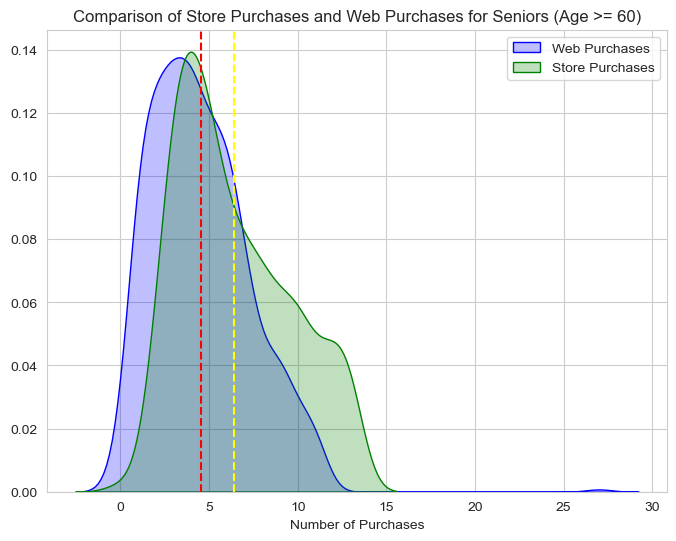

In [49]:
plt.figure(figsize=(8, 6))

sns.kdeplot(seniors_web, color='blue', label='Web Purchases', shade=True)
sns.kdeplot(seniors_store, color='green', label='Store Purchases', shade=True)


plt.title("Comparison of Store Purchases and Web Purchases for Seniors (Age >= 60)")
plt.xlabel("Number of Purchases")
plt.ylabel("")
plt.legend()

plt.axvline(seniors_web.mean(), color='red', linestyle='--')
plt.axvline(seniors_store.mean(), color='yellow', linestyle='--')

plt.show()

#means are far, there is significant value

#### Customers with kids probably have less time to visit a store and would prefer to shop online.

In [30]:
#Gets the customers with kids and compares their shopping activity, online vs. in store
#Type: Two sample Paired t-test (same group twice)

family_web = df[df['Total_Children']>0]['NumWebPurchases']
family_store = df[df['Total_Children']>0]['NumStorePurchases']

# Determine significance level
alpha = 0.05

# Calculate the p-value
_, p_value = stats.ttest_rel(family_web, family_store, alternative='greater')

# if the p-value is less than the significance level, reject the null hypothesis
print(f"p-value: {p_value:.4f}")
if p_value <= alpha:
    test_result = "there is strong evidence suggesting web purchases is grater than store shopping!"
else:
    test_result = "there is not enough evidence to show that web purchases is grater than store shopping"

print(test_result)

p-value: 1.0000
there is not enough evidence to show that web purchases is grater than store shopping


/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/32538398.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(family_web, color='darkblue', label='Web Purchases', shade=True)
/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/32538398.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(family_store, color='pink', label='Store Purchases', shade=True)


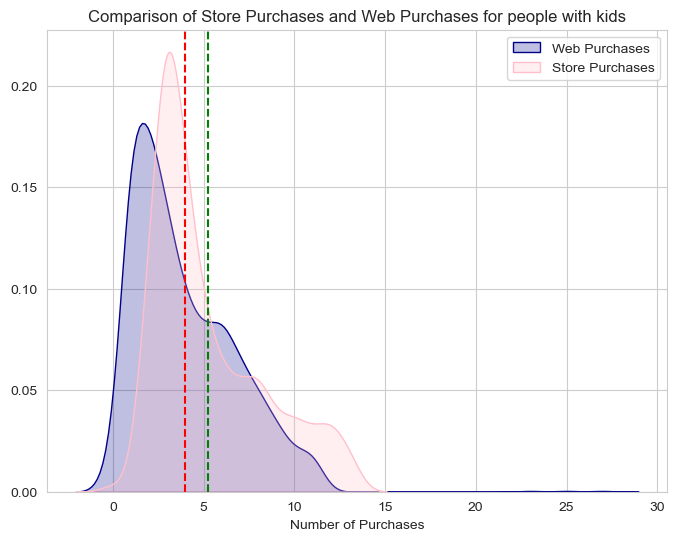

In [51]:
plt.figure(figsize=(8, 6))

sns.kdeplot(family_web, color='darkblue', label='Web Purchases', shade=True)
sns.kdeplot(family_store, color='pink', label='Store Purchases', shade=True)


plt.title("Comparison of Store Purchases and Web Purchases for people with kids")
plt.xlabel("Number of Purchases")
plt.ylabel("")
plt.legend()

plt.axvline(family_web.mean(), color='red', linestyle='--')
plt.axvline(family_store.mean(), color='green', linestyle='--')

plt.show()

#means are close, there is not enough significance.

#### Other distribution channels may cannibalize sales at the store.

In [32]:
#Summing the purchases for channels other than store
df['other_channels_purch'] = df.loc[:,['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases']].sum(axis=1)

In [33]:
#Two-sample Unpaired t-test (two different groups, same task)
#Independent sample t-test.

#p-value smaller than alpha

alpha = 0.05 # <-- significance level
_, p_value = stats.ttest_ind(df['other_channels_purch'], df["NumStorePurchases"], alternative='greater')
print('p_value:', p_value)
if p_value <= alpha:
    test_result = "there is strong evidence suggesting that sales in other channels are significantly better than sales in the store."
else:
    test_result = "no sufficient evidence to show significant difference between sales made by other channels and the store"
    
print(test_result)

p_value: 5.378849908380916e-128
there is strong evidence suggesting that sales in other channels are significantly better than sales in the store.


/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/3728092042.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['other_channels_purch'], color='red', label='other channel purchases', shade=True)
/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/3728092042.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["NumStorePurchases"], color='black', label='Store Purchases', shade=True)


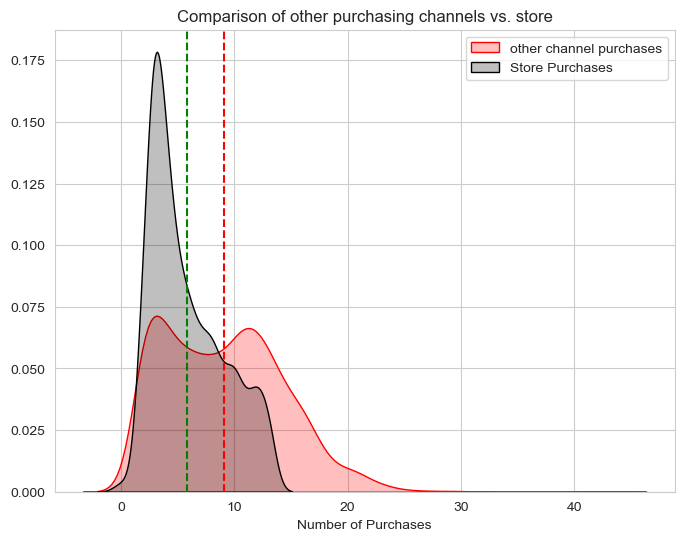

In [52]:
plt.figure(figsize=(8, 6))

sns.kdeplot(df['other_channels_purch'], color='red', label='other channel purchases', shade=True)
sns.kdeplot(df["NumStorePurchases"], color='black', label='Store Purchases', shade=True)


plt.title("Comparison of other purchasing channels vs. store")
plt.xlabel("Number of Purchases")
plt.ylabel("")
plt.legend()

plt.axvline(df['other_channels_purch'].mean(), color='red', linestyle='--')
plt.axvline(df["NumStorePurchases"].mean(), color='green', linestyle='--')

plt.show()

#means are far, there is significant value

#### Does the US fare significantly better than the rest of the world in terms of total purchases?

In [63]:
#Summing the total purchases in all channels to a column Total_Purchases
df['Total_Purchases'] = df.loc[:,['NumDealsPurchases','NumWebPurchases', 
                                  'NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

In [71]:
#Getting the specific columns needed
#US_Spending includes the total purchases in the US
#Wolrd_Spending includes the total purchases in the world

#Two-sample Unpaired t-test (two different groups, same task)
#Independent sample t-test.

#p-value bigger than alpha

US_Spending = df[df['Country']=='US']['Total_Purchases']
World_Spending = df[df['Country']!='US']['Total_Purchases']

alpha = 0.05 # <-- significance level
_, p_value = stats.ttest_ind(US_Spending, World_Spending, alternative='greater')
print('p_value:', p_value)
if p_value <= alpha:
    test_result = "there is strong evidence suggesting that US fair significantly better than the rest of the world in terms of total purchases."
else:
    test_result = "no sufficient evidence to show significant difference between the US and the world."
print(test_result)

p_value: 0.07517436820768097
no sufficient evidence to show significant difference between the US and the world.


/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/3649279393.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(US_Spending, color='skyblue', label='US Spending', shade=True)
/var/folders/v_/j7pm66yx127f_tm4rk3809z80000gn/T/ipykernel_8455/3649279393.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(World_Spending, color='purple', label='World Spending', shade=True)


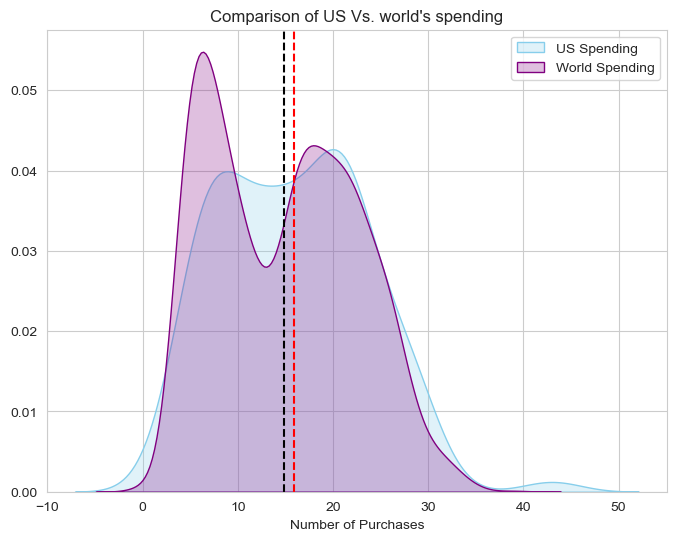

In [55]:
plt.figure(figsize=(8, 6))

sns.kdeplot(US_Spending, color='skyblue', label='US Spending', shade=True)
sns.kdeplot(World_Spending, color='purple', label='World Spending', shade=True)


plt.title("Comparison of US Vs. world's spending")
plt.xlabel("Number of Purchases")
plt.ylabel("")
plt.legend()

plt.axvline(US_Spending.mean(), color='red', linestyle='--')
plt.axvline(World_Spending.mean(), color='black', linestyle='--')

plt.show()

#means are close, there is not enough significance.

### Stage 4: Data Visualization

#### Which products are performing the best, and which are performing the least in terms of revenue?

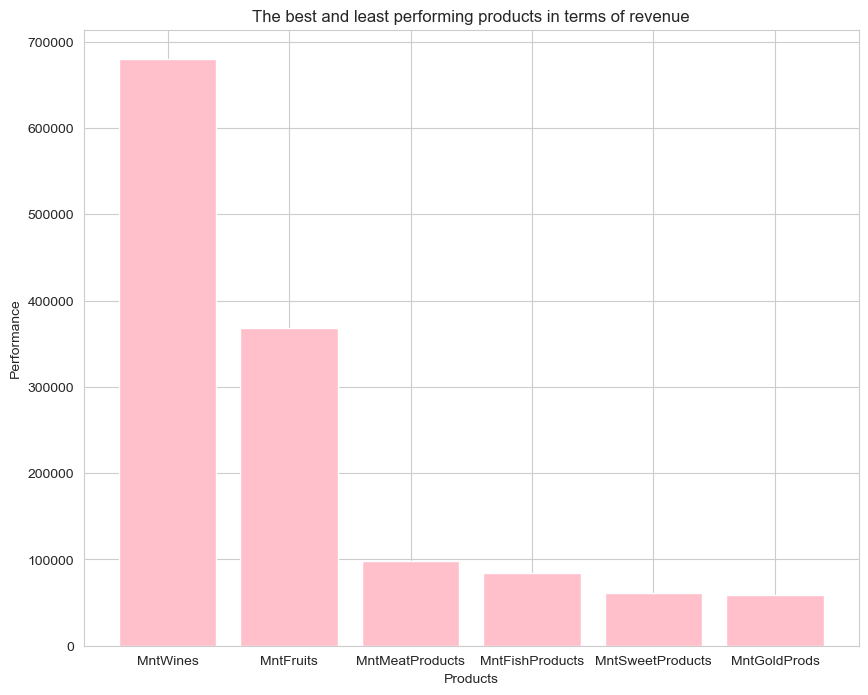

In [65]:
Products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
Performance = df[Products].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.bar(Products, Performance, color= 'pink')
plt.title('The best and least performing products in terms of revenue')
plt.xlabel('Products')
plt.ylabel('Performance')

plt.show()

#### Is there any pattern between the age of customers and the last campaign acceptance rate?

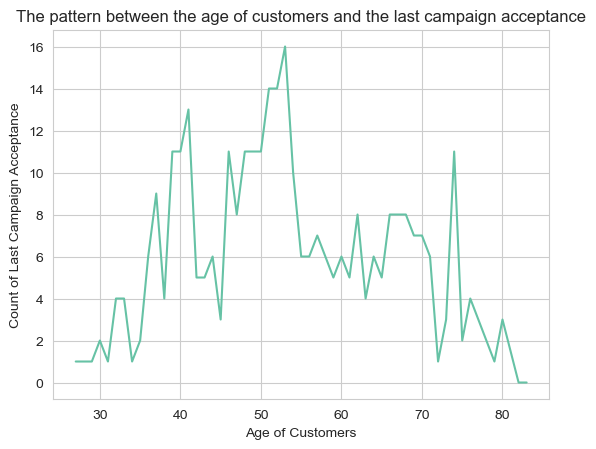

In [60]:
# importing the required libraries 
import matplotlib.pyplot as plt 
import numpy as np 

g = df.groupby('Age')['Response'].sum()
x = g.index
y = g.values

plt.plot(x, y)
plt.xlabel("Age of Customers")
plt.ylabel("Count of Last Campaign Acceptance")
plt.title("The pattern between the age of customers and the last campaign acceptance")
plt.show()

#### Which Country has the greatest number of customers who accepted the last campaign?

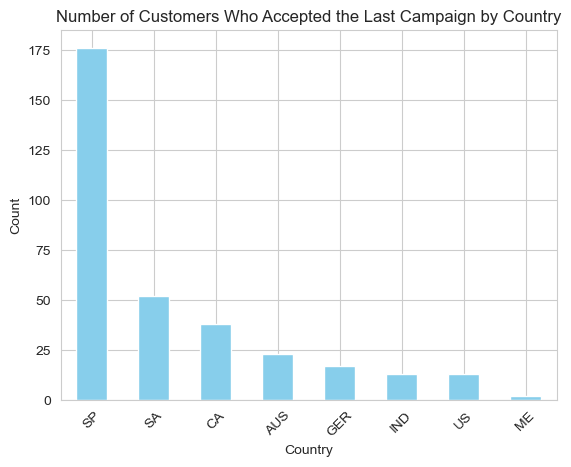

In [66]:
country_count = df.groupby("Country")["Response"].sum().sort_values(ascending=False)

max_acceptance = country_count.max()

country_count.plot(kind="bar", color="skyblue")

plt.bar(max_acceptance, country_count)

plt.title("Number of Customers Who Accepted the Last Campaign by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

#### Do you see any pattern in the no. of children at home and total spend?

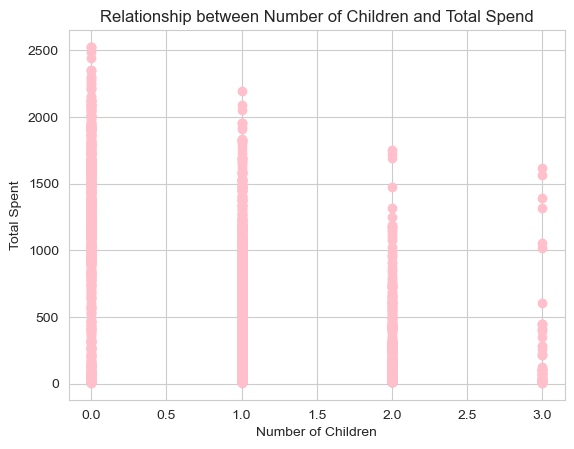

In [58]:
plt.scatter(df['Total_Children'], df['Total_Spending'], color='pink')
plt.title("Relationship between Number of Children and Total Spend")
plt.xlabel("Number of Children")
plt.ylabel("Total Spent")
plt.grid(True)
plt.show()

#### Education background of the customers who complained in the last 2 years.

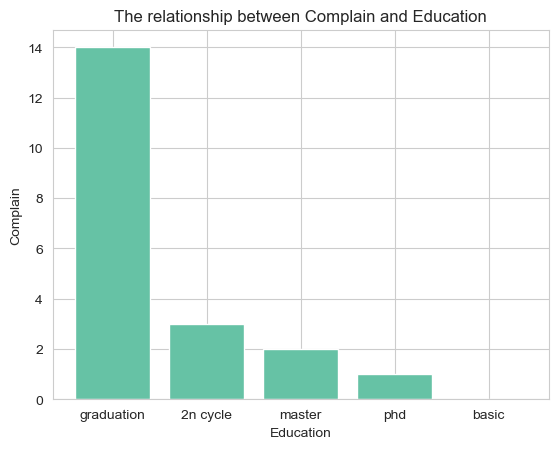

In [42]:
e = df.groupby('Education')['Complain'].sum().sort_values(ascending=False)
plt.bar(e.index, e.values)

plt.title('The relationship between Complain and Education')
plt.xlabel('Education')
plt.ylabel('Complain')
plt.show()

## Insight

##### The objective was to gain a better understanding of the various factors that contribute to customer acquisition.
##### The results of the exploratory data analysis and hypothesis testing we carried out led us to conclude the following:
1. It is true that older people may not be as tech-savvy and prefer shopping in-store. According to the analysis, there is strong evidence suggesting that store purchases are greater than web shopping.
2. Customers with kids probably have less time to visit a store and would prefer to shop online. However, there is not enough evidence to show that web purchases are greater than store shopping.
3. Other distribution channels may cannibalize sales at the store, and there is strong evidence suggesting that sales in other channels are significantly better than sales in the store.
4. Total purchases in the US are not significantly higher than elsewhere.
5. MntWines are performing the best, while MntFruits are performing the least in terms of revenue according to the analysis.
6. There is a pattern between the age of customers and the last campaign acceptance rate.
7. SP has the greatest number of customers who accepted the last campaign.
8. People with kids spend less.
9. Graduation people complain a lot more.


##### Here are some ideas for increasing customer acquisition:
##### To improve customer acquisition, consider offering in-store promotions and discounts 
##### to attract older customers who prefer shopping in-store. For customers with kids who prefer 
##### shopping online, consider offering free shipping and returns, as well as a user-friendly website
##### and mobile app. To address the issue of cannibalization by other distribution channels, offer 
##### exclusive products or services that are only available in-store, and provide incentives for 
##### customers to visit the store, such as loyalty programs or special events. To improve revenue 
##### from MntFruits, offer promotions or discounts on these products, and explore new marketing 
##### channels or strategies to increase awareness and demand. To capitalize on the pattern between 
##### age and campaign acceptance rate, target campaigns to specific age groups. To encourage spending 
##### by customers with kids, offer family-friendly products or services that cater to their needs, 
##### and provide incentives for larger purchases. Finally, to reduce complaints from customers 
##### with a graduation background, provide more detailed product information and instructions.